In [ ]:
#Importamos las librerias necesarias
from google.colab import drive
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
#En caso de que no se monte el drive correctamente
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importar las librerias y las renombramos para mas facilidad
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png') #para la visualizacion

#cargar el archivo en csv
gas_df = pd.read_csv('/content/drive/MyDrive/Datos Financieros/Gas_entre.csv')

#Cambiamos los datos para poder usar prophet
gas_df['Fecha'] = pd.to_datetime(gas_df['Fecha'])
gas_df = gas_df.sort_values('Fecha')
gas_df = gas_df.rename(columns={"Fecha":"ds","IPGN mxn":"y"})


<ipython-input-3-970f00c180dd>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png') #para la visualizacion


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplqtqmouc/_nshsiv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplqtqmouc/2_qoneo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19015', 'data', 'file=/tmp/tmplqtqmouc/_nshsiv5.json', 'init=/tmp/tmplqtqmouc/2_qoneo1.json', 'output', 'file=/tmp/tmplqtqmouc/prophet_modeldtqkd_es/prophet_model-20231201004106.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:41:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:41:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x500 with 0 Axes>

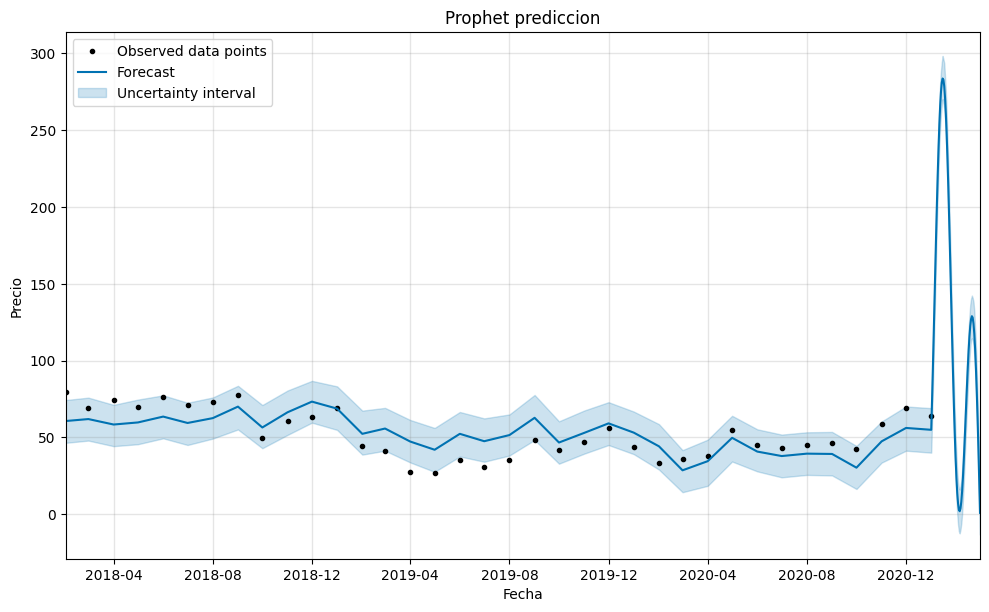

In [ ]:
#Cargamos el modelo de Prophet
m = Prophet()
m.fit(gas_df) #ajustamos el modelo
future = m.make_future_dataframe(periods=60) #A 60 periodos
forecast = m.predict(future)
plt.figure(figsize=(10,5))
m.plot(forecast)
# Nombrar la grafica
plt.xlim(forecast.ds.min(), forecast.ds.max())
plt.title("Prophet prediccion")
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()


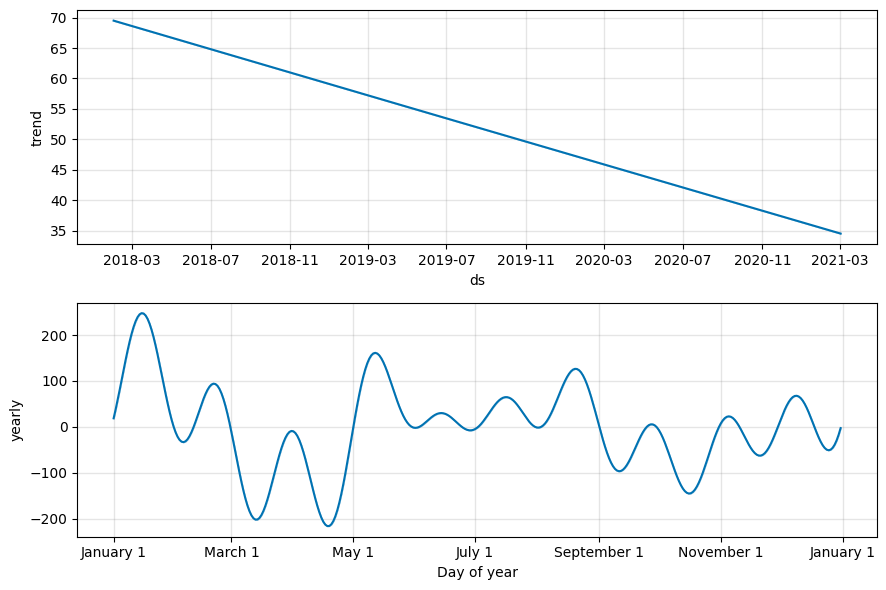

In [ ]:
components = m.plot_components(forecast)


In [ ]:
#Herramienta de prophet
plot_plotly(m, forecast)

<Figure size 1000x500 with 0 Axes>

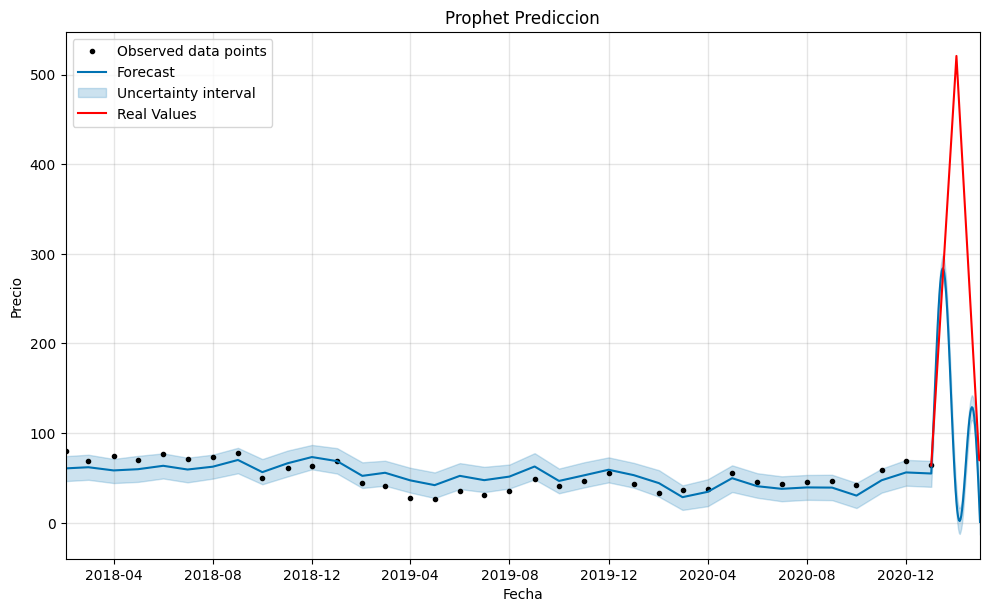

In [ ]:
#Cargamos los datos reales
real_data = pd.read_csv('/content/drive/MyDrive/Datos Financieros/Gas_real.csv', encoding='latin-1') # Replace with the actual file name
#Cambiamos los nombres de columnas y tipos de datos
real_data['Fecha'] = pd.to_datetime(real_data['Fecha']) # Assuming 'date' is the column name containing dates
real_data = real_data.sort_values('Fecha')
real_data = real_data.rename(columns={"Fecha":"ds","IPGN mxn":"y"})

#Graficamos de nuevo la proyeccion
plt.figure(figsize=(10,5))
m.plot(forecast)
plt.plot(real_data.ds, real_data.y, label='Real Values', color="red") #encimamos los reales
plt.xlim(forecast.ds.min(), forecast.ds.max()) #ajustar grafica
plt.title("Prophet Prediccion")
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()